### Data visualisations for clean data from pig queries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('clean_data.csv')

In [3]:
data.head()

,1,Toy Story,1995,"(Adventure,Animation,Children,Comedy,Fantasy)",193,2,1435856890
0,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",182,4.0,1063289621
1,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",273,5.0,835861234
2,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",490,3.5,1328229305
3,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",153,2.0,1525548642
4,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",323,3.5,1422640363


In [4]:
data = data.rename(columns={'1':'movieId', 'Toy Story':'title', '1995':'year', '(Adventure,Animation,Children,Comedy,Fantasy)':'genres', '193':'userId', '2':'ratings', '1435856890':'timestamp'})

In [5]:
data.head(1)

,movieId,title,year,genres,userId,ratings,timestamp
0,1,Toy Story,1995.0,"(Adventure,Animation,Children,Comedy,Fantasy)",182,4.0,1063289621


In [6]:
data.isna().sum()

movieId       0
title         3
year         17
genres        0
userId        0
ratings       0
timestamp     0
dtype: int64

In [7]:
data.shape

(100835, 7)

In [8]:
data = data.dropna()

In [9]:
data.isna().sum()

movieId      0
title        0
year         0
genres       0
userId       0
ratings      0
timestamp    0
dtype: int64

In [10]:
data.shape

(100818, 7)

Remove years outside of range 1900 and 2021

In [17]:
data = data.drop(data[(data.year < 1900)].index)
data = data.drop(data[(data.year > 2021)].index)

In [18]:
data["year"].value_counts()

1995.0    6143
1994.0    5296
1999.0    4516
1996.0    4473
2000.0    4308
          ... 
1903.0       2
1919.0       1
1917.0       1
1915.0       1
1908.0       1
Name: year, Length: 107, dtype: int64

### Visualisations

Distribution plot of rating figures

Text(0.5, 1.02, 'Distribution of ratings')

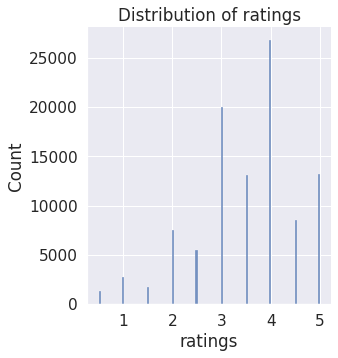

In [22]:
sns.set(font_scale=1.4)
sns.displot(data["ratings"])
plt.title("Distribution of ratings", y=1.02)

Number of movies by year

Text(0.5, 1.02, 'Number of movies per year')

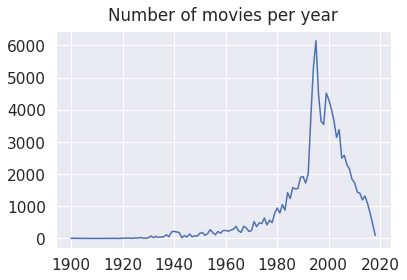

In [29]:
data["year"].value_counts().sort_index().plot()
plt.title("Number of movies per year", y=1.02)

Average ratings per year

Text(0.5, 1.02, 'Average rating per year')

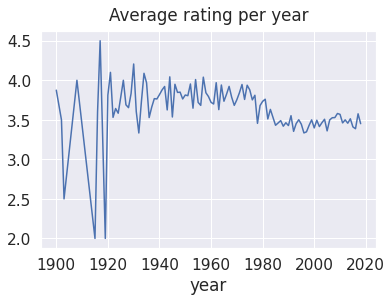

In [30]:
data.groupby(["year"])["ratings"].mean().plot()
plt.title("Average rating per year", y=1.02)